<a href="https://colab.research.google.com/github/DingLi23/s2search/blob/pipelining/pipelining/exp5/exp5_cslg_plotting_shap.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Experiment Description

Obtain shap values.

### Initialization

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np, sys, os
in_colab = 'google.colab' in sys.modules
# fetching code and data(if you are using colab
if in_colab:
    !rm -rf s2search
    !git clone --branch pipelining https://github.com/youyinnn/s2search.git
    sys.path.insert(1, './s2search')
    %cd s2search/pipelining/exp5/

pic_dir = os.path.join('.', 'plot')
if not os.path.exists(pic_dir):
    os.mkdir(pic_dir)

### Loading data

Got sample data: cslg


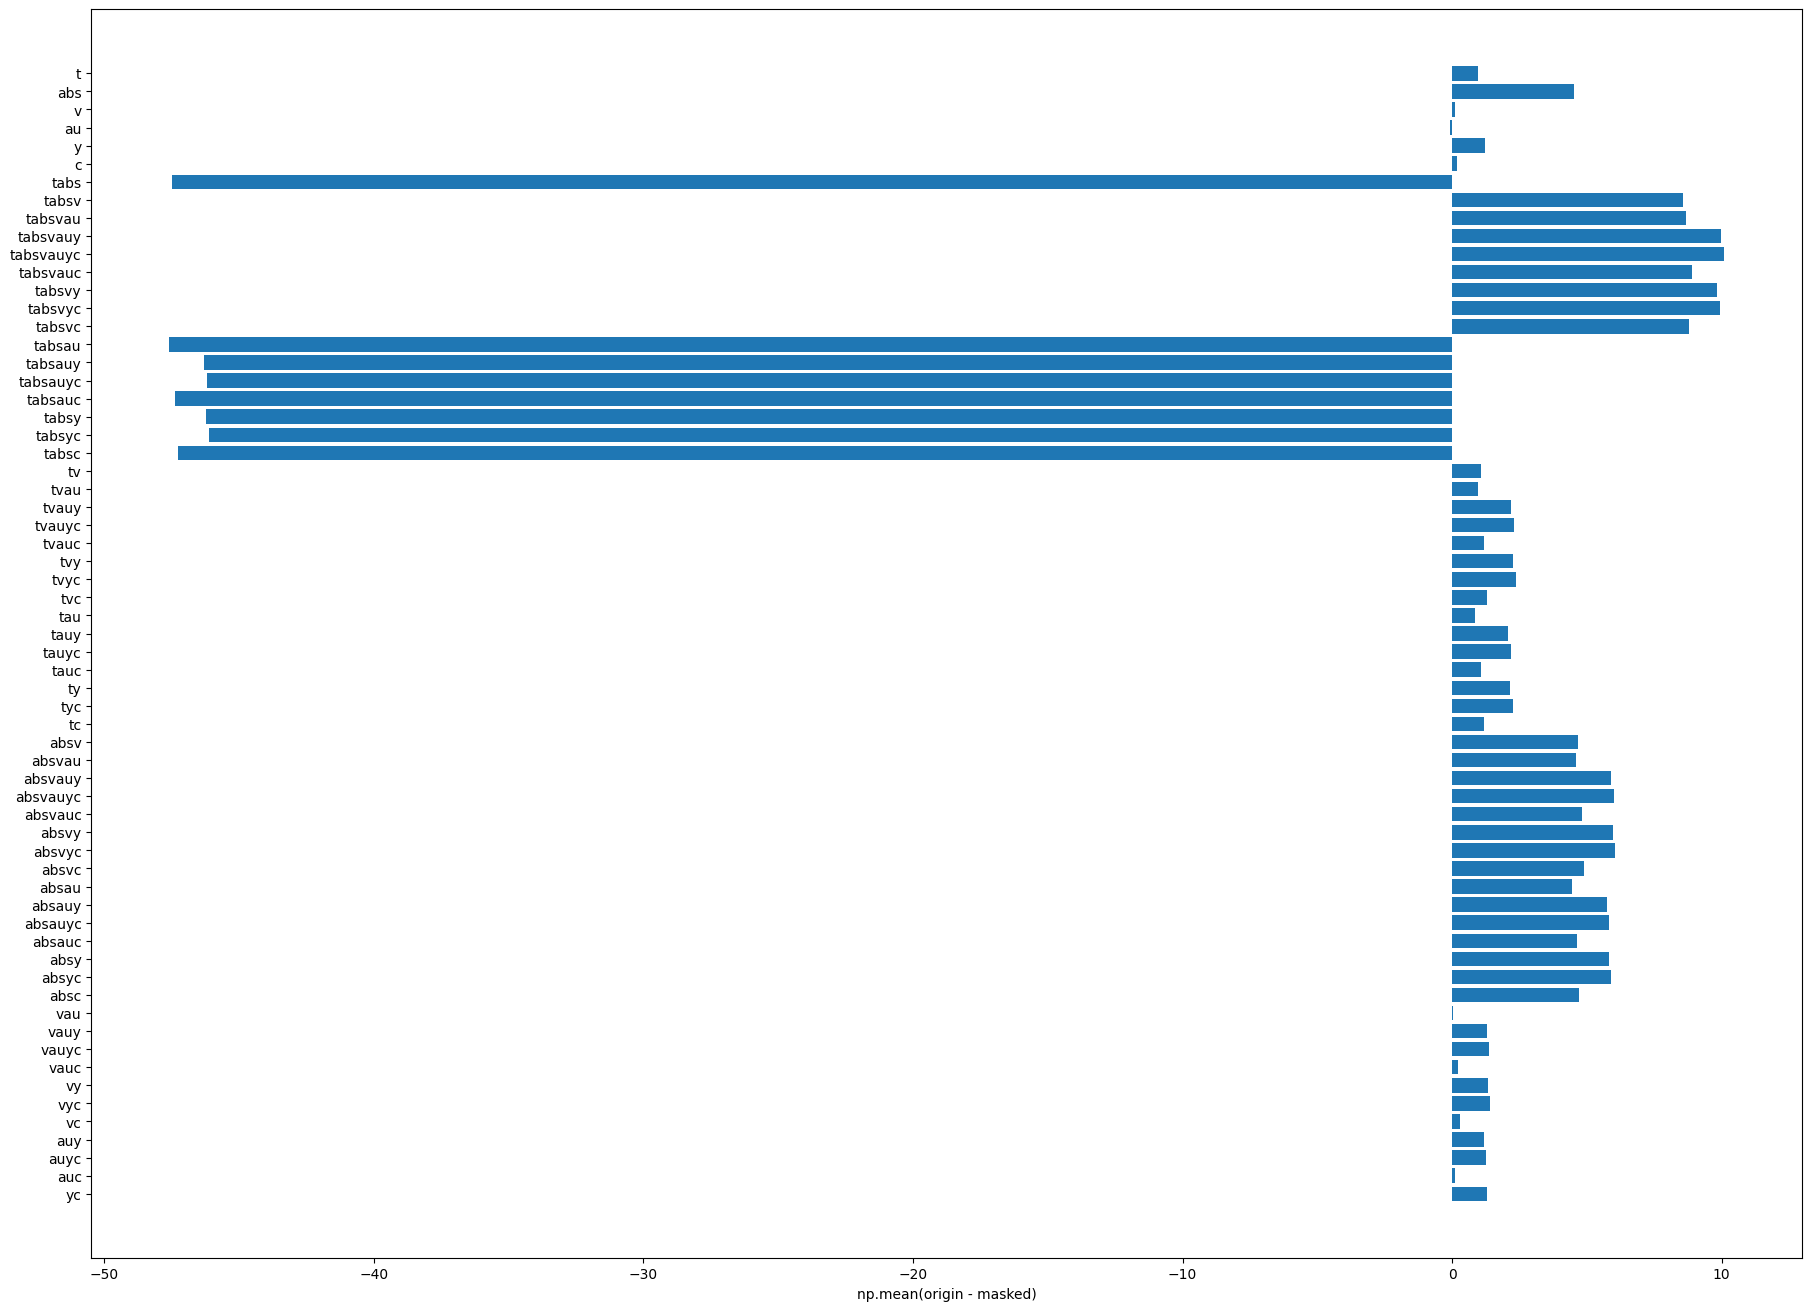

{'key': 't', 'value': 0.9475629362237415}
{'key': 'abs', 'value': 4.510905330109446}
{'key': 'v', 'value': 0.11320730654283286}
{'key': 'au', 'value': -0.07609763034782958}
{'key': 'y', 'value': 1.2251428936639692}
{'key': 'c', 'value': 0.19258389296639783}
{'key': 'tabs', 'value': -47.4958847149727}
{'key': 'tabsv', 'value': 8.55043716738413}
{'key': 'tabsvau', 'value': 8.673334264859822}
{'key': 'tabsvauy', 'value': 9.978318873578882}
{'key': 'tabsvauyc', 'value': 10.081012586670656}
{'key': 'tabsvauc', 'value': 8.901063170459798}
{'key': 'tabsvy', 'value': 9.842283056711318}
{'key': 'tabsvyc', 'value': 9.94265733089169}
{'key': 'tabsvc', 'value': 8.775383007848747}
{'key': 'tabsau', 'value': -47.58855142252754}
{'key': 'tabsauy', 'value': -46.28380342139749}
{'key': 'tabsauyc', 'value': -46.181046525448906}
{'key': 'tabsauc', 'value': -47.36041474669198}
{'key': 'tabsy', 'value': -46.20441096273634}
{'key': 'tabsyc', 'value': -46.10397350569913}
{'key': 'tabsc', 'value': -47.2705282

In [2]:
sys.path.insert(1, '../../')
import numpy as np, sys, os
from getting_data import get
from feature_masking import masking_options

sample_data_and_config_arr = get('exp5', 'cslg')

shapley_need = []
import matplotlib.pyplot as plt

for sample_data_and_config in sample_data_and_config_arr:
    y_values = []
    sample_origin_npy = sample_data_and_config['origin']
    idx = 0
    for array in sample_data_and_config['feature_stack']:

        # define your y axis value here
        y_value = np.absolute((sample_origin_npy - array) / sample_origin_npy)
        # y_value = sample_origin_npy - array
        y_values.append(y_value)
        
        shapley_need.append({
            'key': sample_data_and_config['masking_option_keys'][idx],
            'value': np.mean(sample_origin_npy - array)
        })
        
        idx += 1

    y_values = np.array(y_values)
    sample_data_and_config['y_values'] = y_values

# shapley_need = sorted(shapley_need, key=lambda x: -x['value'])

keys = []
values = []
for s in shapley_need:
    keys.append(s['key'])
    values.append(s['value'])

y_pos = np.arange(len(keys))
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(18, 13), constrained_layout=True)

ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos, labels=keys)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('np.mean(origin - masked)')

plt.show()

for kv in shapley_need:
    print(kv)